In [1]:
ENV["JULIA_PKG_SERVER"] = ""
using Pkg; Pkg.activate(@__DIR__)
Pkg.instantiate()

using DataFrames
using Plots
using CategoricalArrays
using Random
using MLJBase: machine, transform
using TableTransforms
using Imbalance

  Activating project at `~/Documents/GitHub/Imbalance.jl/examples`


### 1. Generate Random Data

In [2]:
rng = Random.default_rng()

type="ColTable"
num_rows = 50
num_features = 2
class_probs = [0.5, 0.2, 0.3]
y_ind = 3

Xy, _ = generate_imbalanced_data(num_rows, num_features; min_sep=0.1, class_probs, type, insert_y=y_ind, rng=39)
X, y = generate_imbalanced_data(num_rows, num_features; min_sep=0.1, class_probs, type, rng=39)

((Column1 = [0.223, 0.98, 1.006, 0.82, 0.185, 0.08, 0.845, 0.799, 0.022, 0.143  …  0.197, 0.994, 0.085, 0.672, 0.117, 0.89, 1.073, 0.192, 0.151, 0.972], Column2 = [0.385, 0.842, 0.701, 1.287, 1.032, 0.928, 0.837, 0.565, 0.538, 0.879  …  0.377, 0.693, 0.338, 0.481, 0.38, 1.003, 1.089, 0.308, 0.146, 0.655]), CategoricalValue{Int64, UInt32}[1, 0, 0, 0, 2, 2, 0, 0, 2, 2  …  1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

### 2. Apply ENN Undersampler

#### Using Imbalance Only

In [3]:
@warn "asdasd"

┌ Warning: asdasd
└ @ Main /Users/essam/Documents/GitHub/Imbalance.jl/examples/undersample_enn.ipynb:1


In [9]:
X_under, y_under = enn_undersample(X, y; keep_condition="all", min_ratios = 0.01, rng = 42)
checkbalance(y_under)

1: ▇▇▇▇▇▇▇▇▇▇▇▇ 6 (25.0%) 
2: ▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇ 11 (45.8%) 
0: ▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇ 24 (100.0%) 


#### Using MLJ

In [6]:
naive_model = Imbalance.MLJ.ENNUndersampler(
	k = 4,
	keep_condition = "all",
	min_ratios = Dict(0 => 1.0, 1 => 1.0, 2 => 0.9),
	rng = 42,
)
mach = machine(naive_model)
X_under, y_under = transform(mach, X, y)


Progress:  67%|███████████████████████████▍             |  ETA: 0:00:00


((Column1 = [0.223, 0.193, 0.154, 0.225, 0.166, 0.091, 0.158, 0.197, 0.085, 0.117  …  0.143, 0.159, 0.056, 0.144, -0.05, 0.125, 0.099, 0.08, 0.147, 0.154], Column2 = [0.385, 0.345, 0.388, 0.336, 0.488, 0.47, 0.268, 0.377, 0.338, 0.38  …  0.879, 0.923, 0.672, 0.825, 0.751, 0.92, 0.921, 1.165, 0.843, 1.0]), CategoricalValue{Int64, UInt32}[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Using TableTransforms

In [7]:
using Imbalance: TableTransforms.ENNUndersampler
naive_model_t = ENNUndersampler(y_ind, min_ratios=Dict(0=>1.0, 1=> 0.9, 2=>1.0), rng=42)
Xyover = Xy |> naive_model_t

(Column1 = [0.223, 0.193, 0.154, 0.225, 0.166, 0.091, 0.158, 0.197, 0.085, 0.117  …  0.143, 0.159, 0.056, 0.144, -0.05, 0.125, 0.099, 0.08, 0.147, 0.154],
 Column2 = [0.385, 0.345, 0.388, 0.336, 0.488, 0.47, 0.268, 0.377, 0.338, 0.38  …  0.879, 0.923, 0.672, 0.825, 0.751, 0.92, 0.921, 1.165, 0.843, 1.0],
 Column3 = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0],)

### 3. Plot the Results

    Updating registry at `~/.julia/registries/General`


    Updating git-repo `https://github.com/JuliaRegistries/General.git`


   Resolving package versions...


  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Project.toml`
  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Manifest.toml`


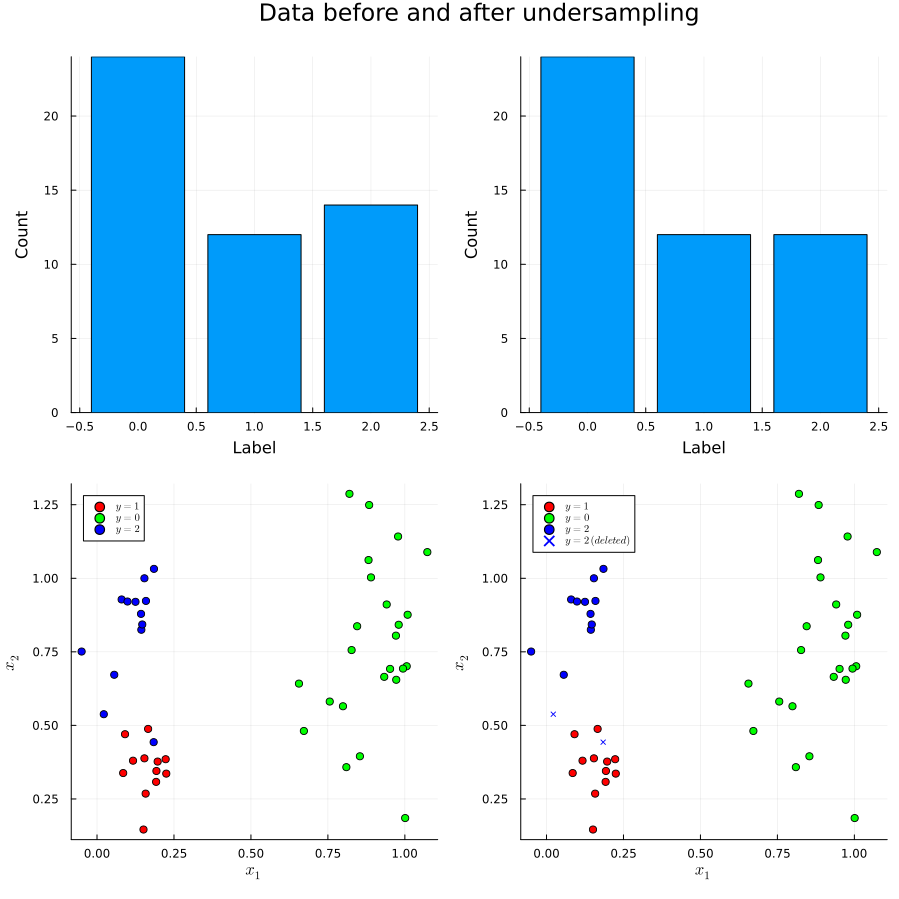

In [8]:
include("plot.jl")                      # provides a plot function to compare results
plot_data(y, y_under, X, X_under)